<h1>Music genre classifier</h1>

Our life is filled with music, we can hear music everywhere. Music also has rich diversity. These diversities can be viewed by seeing the number of genres in the music. The model trained below is a music genre classifier.  


<h2>About the dataset</h2>
For, training the model, the popular gtzan dataset has been used. This dataset has one folder and two csv files. The folder has 10 genres as subfolders each having 100 songs of length 30 seconds. One CSV file is made for these songs. This CSV file has some key properties of sound like chroma features, rms, spectogram's centroid etc. The other CSV file also has the same properties listed for each song, but for properties compution each song has been split into 10 different songs(i.e 30 seconds song into 10 3seconds songs) and the properties are computed.

You can download it here: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification


<u>Model used</u>:
Dense Neural Network, with one hidden layer(Seperate file has been attached for explaining the dense neural network properties - in './Dense Neural Network for music genre classification.pdf').

Altered code percentage: <mark>>75%</mark><br><br>
Acquired accuracy(testing): <mark>86.69%</mark>


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Softmax
import os
from tabulate import tabulate

In [63]:
df = pd.read_csv('./data/features_3_sec.csv')

In [64]:
# Storing genres
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [65]:
# Dropping length and filename columns from the dataframe

df = df.drop(labels='filename', axis=1)
df = df.drop(labels='length', axis=1)

In [66]:
# Converting label names into some numericals so that it would be feasible for the model to predict

labels = df.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(labels)

In [68]:
# Transforming the data using standard scaler so the model is trained properly. We basically calculate mean and variance
# Then we transform each x belonging to the dataset as (x-mean)/variance

fit = StandardScaler()

X = fit.fit_transform(np.array(df.iloc[:,:-1], dtype=float))

In [69]:
# Splitting the data into training, testing sets, with test size of 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


In [70]:
# Dense neural network

model = Sequential([
   Flatten(input_shape=(X_train[0].shape)),
   Dense(128, activation='relu'),
   Dense(10)
])


In [71]:
# Compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
# Training the model

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 1.3674 - accuracy: 0.5291
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9311 - accuracy: 0.6946
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.7814 - accuracy: 0.7455
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.7778
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7968
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8140
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.8285
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8388
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8523
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4347 - accura

In [77]:
# Model evaluation for training data

train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)

print(f'\nTest accuracy: {round(train_acc*100, 2)}%')

219/219 - 0s - loss: 0.0058 - accuracy: 0.9993 - 323ms/epoch - 1ms/step

Test accuracy: 99.93%


In [76]:
# Model evaluation for testing data

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(f'\nTest accuracy: {round(test_acc*100, 2)}%')

94/94 - 0s - loss: 0.7101 - accuracy: 0.8669 - 161ms/epoch - 2ms/step

Test accuracy: 86.69%


In [82]:
# Extentding the model to get probailities of a song belonging to different genres

probability_model = Sequential([model, Softmax()])

In [83]:
# Getting predictions of test data

predictions = probability_model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [84]:
print(predictions.shape)
print(predictions[0])

(2997, 10)
[2.2785720e-25 4.6003585e-21 2.6316620e-12 3.3120859e-06 3.6926970e-08
 1.1166117e-08 5.4278426e-09 2.7306380e-02 6.8962057e-05 9.7262120e-01]


Clearly each prediction is of size 10. Each of the 10 values represent the probabilites of a song belonging to corresponding genres. So, we consider that probaility which is maximum and we will assert that the song belongs to that particular genre.

Let us test the model for some songs

In [90]:
current_song = X[5]
current_genre = y[5]

genre_probabilties = probability_model.predict(X[5:6])

1/1 [==============================] - 0s 33ms/step


In [91]:
# Checking probablities 

genre_probabilties

array([[8.9979541e-01, 3.4130671e-10, 1.1151154e-03, 5.9394736e-02,
        2.4774173e-02, 1.8828474e-07, 1.0900527e-02, 3.0716692e-13,
        2.9638825e-06, 4.0168944e-03]], dtype=float32)

In [94]:
# Finding index having max probability

highest_probability_index = np.argmax(genre_probabilties)

In [98]:
# Comparing prediction and correct genres

predicted_genre = genres[highest_probability_index]
correct_genre = genres[current_genre]

print(f'Predicted genre: {predicted_genre}')
print(f'Current genre: {correct_genre}')

Predicted genre: blues
Current genre: blues


Checking the same as above for some random samples

In [99]:
random_indices = np.random.choice(np.arange(len(X)), 20, replace=False)

In [102]:
X_sample = X[random_indices]
y_sample = y[random_indices]

In [110]:
sample_prediction = probability_model.predict(X_sample)

1/1 [==============================] - 0s 39ms/step


In [111]:
sample_predicted_indices = [np.argmax(i) for i in sample_prediction]

In [115]:
sample_predicted_genres = [genres[i] for i in sample_predicted_indices]
sample_genres = [genres[i] for i in y_sample]

In [118]:
# Comparing

headers = ['Actual genre', 'Predicted genre']
data = list(zip(sample_genres, sample_predicted_genres))

print(tabulate(data, headers=headers, tablefmt="grid"))

+----------------+-------------------+
| Actual genre   | Predicted genre   |
+================+===================+
| blues          | blues             |
+----------------+-------------------+
| pop            | pop               |
+----------------+-------------------+
| pop            | pop               |
+----------------+-------------------+
| pop            | pop               |
+----------------+-------------------+
| pop            | pop               |
+----------------+-------------------+
| country        | country           |
+----------------+-------------------+
| country        | country           |
+----------------+-------------------+
| jazz           | jazz              |
+----------------+-------------------+
| disco          | disco             |
+----------------+-------------------+
| hiphop         | hiphop            |
+----------------+-------------------+
| rock           | rock              |
+----------------+-------------------+
| pop            | pop   

Plotting the predicted and actual values

In [124]:
x_axis = np.arange(0, len(X_sample))

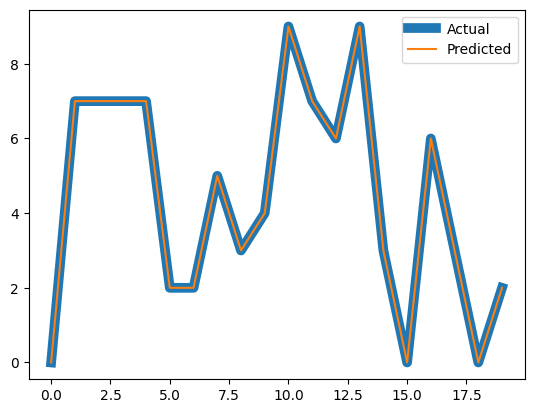

In [134]:
plt.plot(x_axis, y_sample, linewidth='7')
plt.plot(x_axis, sample_predicted_indices)
plt.legend(['Actual', 'Predicted'])

<h2>References</h2>
<ul>
<li>https://towardsdatascience.com/music-genre-recognition-using-convolutional-neural-networks-cnn-part-1-212c6b93da76</li>
<li>https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn</li>
<li>https://www.tensorflow.org/tutorials/keras/classification</li>
<li>https://www.youtube.com/watch?v=Mubj_fqiAv8&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO</li>
</ul>